# PLOTS 

**Proponents:**

- Destin Ecarma 
- Alnino Manwil Pastoriza

Hello! And SURPRISE, Imagine I am your micromanager, and you are my employees and like all micro-managers I demand time from your weekends, so here is your work assignment.

You are given three datasets:

- bar_assignment.csv
- sankey_assignment.csv
- networks_assignment.csv
#### **General Instructions : Use the same font and font size for all graphs.**

**Instructions:**

a. **For Bar Graph:**
- Create a horizontal stacked bar chart Transform 1 into “Yes” and 0 into “No” Follow the plot specification for bar plot

b. **For Sankey Diagram:**
- Create a Sankey Diagram that connects ('PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS') to the LABELS to ('Reg', 'Aca', 'Oth') Follow the Path Specifications

c. **Network Graph:**
- Create the network graph D,F,I,N,S should created as a pentagram located at the center of the graph showing connection with each other. The others should be outside of the the pentagram, still showing connections to other nodes. The node color should be:

- Blue: [D,F,I,N,S]
- Green: ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA’] 
- Yellow: ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']

Finally you are required to collate the separate graph into one single graph for printing, the single graph should be visible when copy pasted in a long bond paper.


## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import networkx as nx
import plotly.express as px
import kaleido
from IPython.display import display 
from PIL import Image  


## Stack Horizontal Bar Chart

In [6]:
import pandas as pd
bar_data = pd.read_csv("bar_assignment.csv")
display(bar_data)

,LABEL,COUNT
0,D,1
1,D,1
2,D,0
3,D,1
4,F,1
5,F,1
6,F,0
7,F,0
8,I,1
9,N,1


In [ ]:

bar_data = pd.read_csv("bar_assignment.csv")

# Aggregate counts for each label
grouped = bar_data.groupby("LABEL")["COUNT"].value_counts().unstack(fill_value=0)

# Rename columns for clarity
grouped.columns = ["No", "Yes"]

# Create a DataFrame suitable for Plotly Express
grouped_reset = grouped.reset_index()

# Melt the DataFrame to long format
melted = grouped_reset.melt(id_vars="LABEL", value_vars=["No", "Yes"], var_name="Response", value_name="Count")

# Create horizontal stacked bar chart
fig = px.bar(melted, x="Count", y="LABEL", color="Response", orientation="h", text="Count",
             color_discrete_map={"No": "red", "Yes": "blue"},
             title="Horizontal Stacked Bar Chart")

# Update text position to be at the end of each section
fig.update_traces(textposition='inside', insidetextanchor='end', textfont_size = 16, textfont_weight = "bold", textfont_family="Arial")

# Customize labels and title
fig.update_layout(
    xaxis_title="Count",
    yaxis_title="Label",
    legend_title="Response",
    legend=dict(yanchor="top", x=0, xanchor="left", y=1.15, orientation="h")
)


fig.write_image("./assets/bar_chart.png")
img = Image.open("./assets/bar_chart.png")
display(img)


NameError: name 'px' is not defined

## Sankey Diagram

In [42]:
df =pd.read_csv("sankey_assignment.csv")
df.head()

,LABEL,PS,OMP,CNP,NRP,NMCCC,PEC,NCDM,RGS,Reg,Aca,Oth
0,S,3,4,1,1,0,0,1,1,2,7,1
1,F,0,1,2,1,1,0,0,1,2,2,0
2,D,1,1,2,0,0,0,1,1,1,3,1
3,N,1,1,1,1,0,1,1,0,2,2,1
4,I,0,1,0,0,0,0,0,0,0,1,0


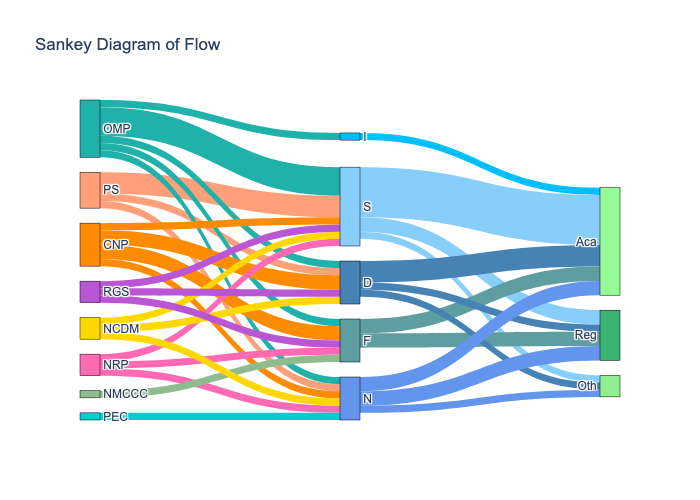

In [46]:


df = pd.read_csv("sankey_assignment.csv")

# Define sources and targets
source_columns = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
target_columns = ['Reg', 'Aca', 'Oth']

# Create lists for Sankey diagram
sources = []
targets = []
values = []
link_colors = []

# Define colors for each label
colors_dict = {
    'PS': '#FFA07A', 'OMP': '#20B2AA', 'CNP': '#FF8C00', 'NRP': '#FF6AB4', 'NMCCC': '#8FBC8F', 
    'PEC': '#02CED1', 'NCDM': '#FFD701', 'RGS': '#BA55D3', 'Reg': '#3CB371', 'Aca': '#97FB98', 
    'Oth': '#90EE8F', 'D': '#4782B4', 'F': '#5F9EA0', 'I': '#00BFFF', 'N': '#6395EC', 'S': '#87CEFA'
}

# First connection: From source columns to LABEL
for source_col in source_columns:
    for i, row in df.iterrows():
        if row[source_col] > 0:
            sources.append(source_col)
            targets.append(row["LABEL"])
            values.append(row[source_col])
            link_colors.append(colors_dict[source_col])  # Add color based on source

# Second connection: From LABEL to target columns
for i, row in df.iterrows():
    for target_col in target_columns:
        if row[target_col] > 0:
            sources.append(row["LABEL"])
            targets.append(target_col)
            values.append(row[target_col])
            link_colors.append(colors_dict[row["LABEL"]])  # Add color based on source

# Convert unique labels to indices
unique_labels = list(set(sources + targets))
label_indices = {label: i for i, label in enumerate(unique_labels)}

# Convert names to indices for Sankey
sources = [label_indices[src] for src in sources]
targets = [label_indices[tgt] for tgt in targets]


# Create a list of colors for the nodes
node_colors = [colors_dict[label] for label in unique_labels]

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=unique_labels,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors  # Add link colors
    )
))

# Customize layout
fig.update_layout(title_text="Sankey Diagram of Flow", font_size=12, font_family="Arial")

fig.write_image("./assets/sankey_diagram.png")
img = Image.open("./assets/sankey_diagram.png")
display(img)


## Network Graph

In [ ]:
df = pd.read_csv("networks_assignment.csv")
pd.set_option('display.max_columns', 38)
df.head()

NameError: name 'pd' is not defined

In [2]:

df = pd.read_csv("networks_assignment.csv")

# Define node groups
central_nodes = ['D', 'F', 'I', 'N', 'S']
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG']
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']
gray_nodes = set(df.columns) - set(central_nodes) - set(green_nodes) - set(yellow_nodes) - {'LABELS'}

# Create graph
G = nx.Graph()
all_defined_nodes = set(central_nodes + green_nodes + yellow_nodes + list(gray_nodes))
G.add_nodes_from(all_defined_nodes)

# Add edges based on adjacency matrix
for _, row in df.iterrows():
    label = row["LABELS"]
    for country, value in row.items():
        if country != "LABELS" and value > 0:
            G.add_edge(label, country)

# Assign node colors
node_colors = {node: 'deepskyblue' for node in central_nodes}
node_colors.update({node: 'green' for node in green_nodes})
node_colors.update({node: 'gold' for node in yellow_nodes})
node_colors.update({node: 'gray' for node in gray_nodes})

# Fix edge colors (based on outer node)
edge_colors = []
for u, v in G.edges():
    outer = u if v in central_nodes else v
    edge_colors.append(node_colors[outer])

# Define pentagram points for central nodes
pentagram_points = [(0, 1), (0.95, 0.31), (0.59, -0.81), (-0.59, -0.81), (-0.95, 0.31)]
pos = {node: pentagram_points[i] for i, node in enumerate(central_nodes)}

# Place outer nodes in a circular pattern
outer_nodes = list(green_nodes) + list(yellow_nodes) + list(gray_nodes)
radius = 3.5
angles = np.linspace(0, 2 * np.pi, len(outer_nodes), endpoint=False)
pos.update({node: (radius * np.cos(angle), radius * np.sin(angle)) for node, angle in zip(outer_nodes, angles)})

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_color=[node_colors[n] for n in G.nodes()], 
        node_size=1200, edge_color=edge_colors, font_size=11, font_weight="bold", font_color="black") 
plt.title("Network Graph", fontsize=16)  

plt.savefig("./assets/network.png")
plt.show()



NameError: name 'pd' is not defined